# Analyzing the results of Graph-Sparse Logistic Regression (GSLR) CV against the "gaussian-mixture perturbation" synthetic datasets

## I. Unpack results.

In [1]:
%pylab inline
import pickle
import numpy as np
import pandas as pd
import networkx as nx
from matplotlib_venn import venn3, venn3_circles, venn2
import seaborn as sns
sns.set(style="whitegrid", palette="muted")

repo_path = '/Users/alex/Documents/gslr/'
KEGG_path = repo_path + 'experiments/KEGG/KEGG_df.filtered.with_correlates.pickle'

# list of pathway_id, losses, features
results = pickle.load(open('GSLR_gmm_results.pickle', 'rb'))

Populating the interactive namespace from numpy and matplotlib


## II. Analyze test-accuracy across folds (k = 10)

In [2]:
accuracies = pd.DataFrame({pathway_id: accuracies for pathway_id, accuracies, features in results})
accuracies

,hsa00970,hsa01521,hsa01522,hsa01523,hsa01524,hsa02010,hsa03008,hsa03010,hsa03013,hsa03015,...,hsa05322,hsa05323,hsa05330,hsa05332,hsa05340,hsa05410,hsa05412,hsa05414,hsa05416,hsa05418
0,0.95,0.40,0.60,0.50,0.45,0.80,1.00,0.90,0.85,0.95,...,1.0,1.00,0.95,1.00,0.95,1.00,1.00,0.95,0.95,0.95
1,0.95,0.20,0.70,0.45,0.60,0.95,0.90,0.90,1.00,0.70,...,1.0,1.00,1.00,0.95,0.95,1.00,1.00,1.00,1.00,1.00
2,0.95,0.40,0.65,0.35,0.40,0.90,0.85,0.85,0.85,0.85,...,1.0,0.95,0.95,1.00,1.00,1.00,1.00,0.95,1.00,1.00
3,0.80,0.50,0.55,0.45,0.65,0.80,1.00,0.95,0.85,0.85,...,1.0,1.00,1.00,1.00,1.00,1.00,1.00,0.90,1.00,1.00
4,1.00,0.55,0.45,0.50,0.35,0.90,1.00,0.90,1.00,0.95,...,1.0,1.00,1.00,1.00,0.85,1.00,0.95,1.00,1.00,1.00
5,0.80,0.35,0.50,0.50,0.40,0.85,0.95,0.95,0.90,0.80,...,1.0,1.00,0.95,1.00,0.90,0.95,1.00,1.00,1.00,0.95
6,1.00,0.70,0.45,0.50,0.60,0.80,1.00,0.90,0.95,0.95,...,1.0,1.00,1.00,1.00,0.90,0.95,1.00,0.95,0.95,0.95
7,1.00,0.30,0.45,0.40,0.30,1.00,0.90,0.95,0.90,0.95,...,1.0,0.95,1.00,0.90,1.00,1.00,0.95,1.00,1.00,0.95
8,0.90,0.45,0.60,0.70,0.55,0.85,0.90,0.80,1.00,1.00,...,1.0,0.95,1.00,0.95,0.90,1.00,1.00,1.00,1.00,1.00
9,1.00,0.25,0.55,0.35,0.55,0.80,1.00,1.00,1.00,0.95,...,1.0,1.00,1.00,1.00,1.00,1.00,0.95,1.00,1.00,1.00


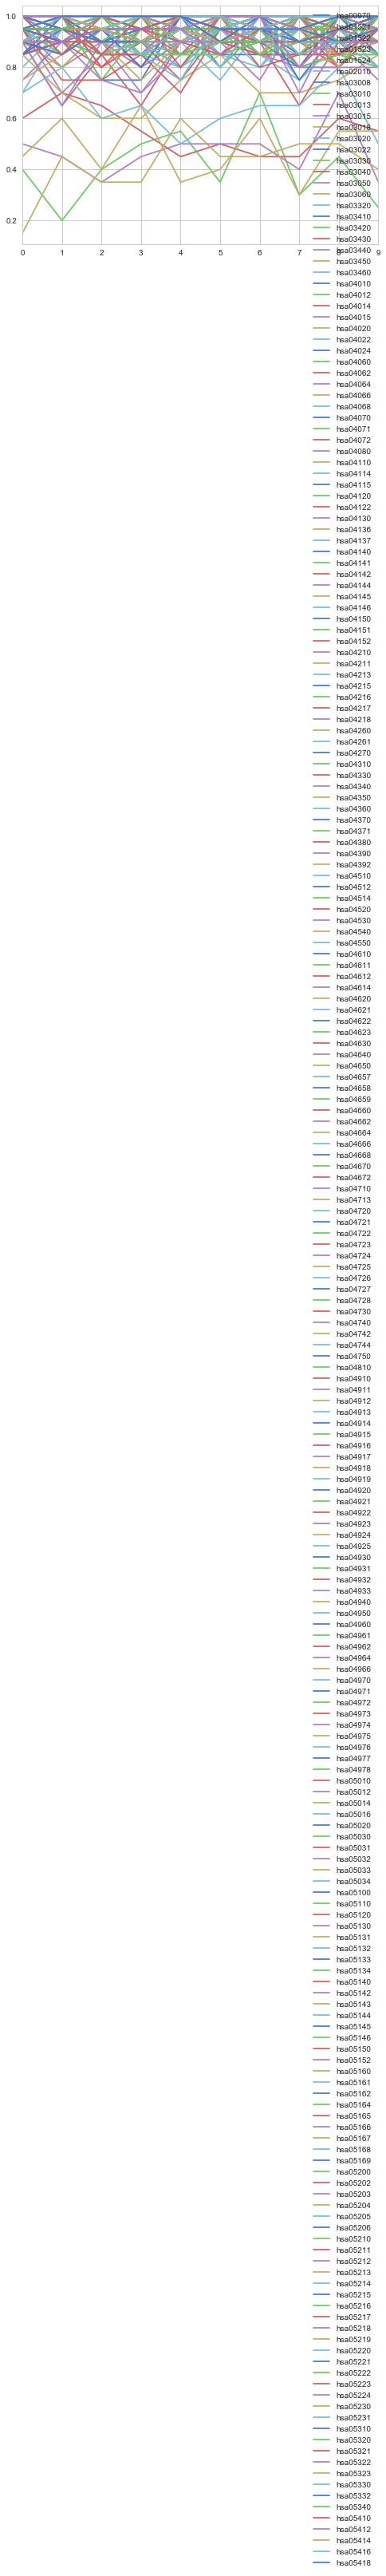

In [3]:
accuracies.plot()

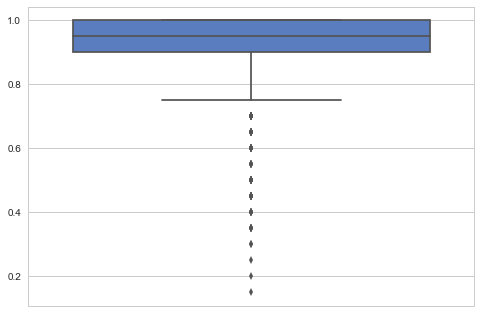

In [4]:
sns.boxplot(y=pd.melt(accuracies)['value'].tolist())

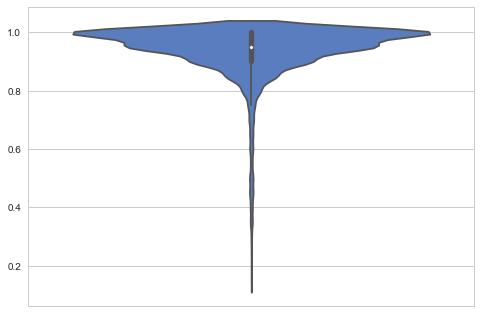

In [5]:
sns.violinplot(y=pd.melt(accuracies)['value'].tolist())

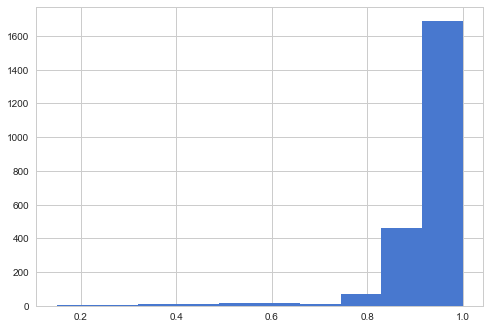

In [6]:
pd.melt(accuracies)['value'].hist()

## III. Analyze pathway recovery

In [8]:
pathways_df = pd.read_pickle(KEGG_path)

pathways = {pathway_id: pathways_df.loc[pd.IndexSlice[:, :, [pathway_id]],['genes', 'correlates']].values[0][0] for pathway_id in pathways_df.index.get_level_values(2)}

features = {pathway_id: features for pathway_id, accuracies, features in results}

set(pathways.keys()) == set(features.keys())

True

In [9]:
features = {key: (set(pathways[key]), set(features[key])) for key in (set(pathways.keys()) & set(features.keys()))}

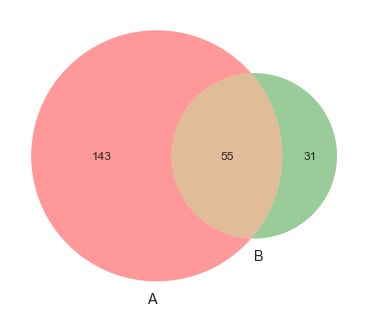

In [10]:
pair = list(features.items())[0][1]
venn2([pair[0], pair[1]])

In [11]:
def recall(truth, pred):    
    return len(truth & pred) / float(len(truth))
    
def precision(truth, pred):
    return len(truth & pred) / float(len(pred))

In [12]:
summary = {pathway: (recall(truth, pred), precision(truth, pred)) for pathway, (truth, pred) in features.items()  if len(truth) > 0}
summary = pd.DataFrame(summary, index=['recall', 'precision'])
summary

,hsa00970,hsa02010,hsa03008,hsa03010,hsa03013,hsa03015,hsa03018,hsa03020,hsa03022,hsa03030,...,hsa05322,hsa05323,hsa05330,hsa05332,hsa05340,hsa05410,hsa05412,hsa05414,hsa05416,hsa05418
recall,0.560606,0.272727,0.475248,0.477124,0.491228,0.626374,0.551282,0.806452,0.688889,0.777778,...,0.285714,0.377778,0.421053,0.439024,0.432432,0.445783,0.513889,0.422222,0.610169,0.345324
precision,0.339450,0.081081,0.500000,0.646018,0.840000,0.612903,0.589041,0.165563,0.300971,0.264151,...,0.447059,0.414634,0.126984,0.130435,0.145455,0.393617,0.445783,0.463415,0.409091,0.607595


In [13]:
summary.mean(axis=1)

recall       0.446803
precision    0.447574
dtype: float64

In [14]:
summary.std(axis=1)

recall       0.160347
precision    0.216431
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c8b4860>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10c919908>]], dtype=object)

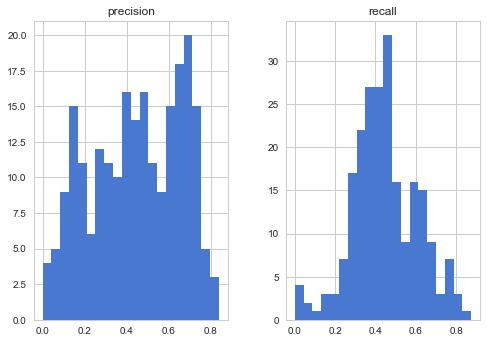

In [15]:
summary.transpose().hist(bins=20)